In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14035611800147312866
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4991025152
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3613254780603390922
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1660 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


In [2]:
import cv2, sys
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageEnhance, ImageChops
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img


In [3]:
import os
import datetime
import time, random
from tqdm import tqdm


In [4]:
folder = "D:/original_image/moonlight"
file_list = [x for x in os.listdir(folder)]

In [5]:
file_list

['IMG_7800.JPG',
 'IMG_7801.JPG',
 'IMG_7802.JPG',
 'IMG_7803.JPG',
 'IMG_7804.JPG',
 'IMG_7805.JPG',
 'IMG_7806.JPG',
 'IMG_7807.JPG',
 'IMG_7808.JPG',
 'IMG_7809.JPG',
 'IMG_7810.JPG',
 'IMG_7811.JPG',
 'IMG_7812.JPG',
 'IMG_7813.JPG',
 'IMG_7814.JPG',
 'IMG_7815.JPG',
 'IMG_7816.JPG',
 'IMG_7817.JPG',
 'IMG_7818.JPG',
 'IMG_7819.JPG',
 'IMG_7820.JPG',
 'IMG_7821.JPG',
 'IMG_7822.JPG',
 'IMG_7823.JPG',
 'IMG_7824.JPG',
 'IMG_7825.JPG',
 'IMG_7826.JPG',
 'IMG_7827.JPG',
 'IMG_7828.JPG',
 'IMG_7829.JPG',
 'IMG_7830.JPG',
 'IMG_7831.JPG',
 'IMG_7832.JPG',
 'IMG_7833.JPG',
 'IMG_7834.JPG',
 'IMG_7835.JPG',
 'IMG_7836.JPG',
 'IMG_7837.JPG',
 'IMG_7838.JPG',
 'IMG_7839.JPG',
 'IMG_7840.JPG',
 'IMG_7841.JPG',
 'IMG_7842.JPG',
 'IMG_7843.JPG',
 'IMG_7844.JPG',
 'IMG_7845.JPG',
 'IMG_7846.JPG',
 'IMG_7847.JPG',
 'IMG_7861.JPG',
 'IMG_7898.JPG',
 'IMG_7899.JPG',
 'IMG_7900.JPG',
 'IMG_7901.JPG',
 'IMG_7902.JPG',
 'IMG_7903.JPG',
 'IMG_7904.JPG',
 'IMG_7905.JPG',
 'IMG_7906.JPG',
 'IMG_7907.JPG

In [7]:
datagen = ImageDataGenerator(
        rotation_range=2,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=0.05,
        zoom_range = 0.1,
        horizontal_flip=False,
        fill_mode="nearest")


In [8]:
print(file_list[0])

IMG_5016.JPG


In [49]:
for i in tqdm(range(len(file_list))):
    image = load_img("D:/original_image/namsan/" + file_list[i])  # PIL 이미지
    x = img_to_array(image)  # (3, 300, 300) 크기의 NumPy 배열
    x = x.reshape((1,) + x.shape)  # (1, 3, 300, 300) 크기의 NumPy 배열

#     아래 .flow() 함수는 임의 변환된 이미지를 배치 단위로 생성해서
#     지정된 `preview/` 폴더에 저장합니다.
    i = 0
    for batch in datagen.flow(x, batch_size=5,
                              save_to_dir="D:/new_image/namsan", save_prefix="super_namsan", save_format="jpg"):
        i += 1
        time.sleep(0.01)
        if i > 4:
            break  # 이미지 20장을 생성하고 마칩니다

100%|████████████████████████████████████████████████████████████████████████████████| 249/249 [00:42<00:00,  5.89it/s]


In [7]:
for i in tqdm(range(len(file_list))):
    image_coex = cv2.imread("D:/original_image/moonlight/" + file_list[i], cv2.IMREAD_UNCHANGED)
    cv2.imwrite("D:/new_image/moonlight/super_moonlight" +str(i) + ".jpg", image_coex)

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 327.44it/s]


In [230]:
image_general = cv2.imread("D:/original_image/castle/20210827_174607.jpg", cv2.IMREAD_UNCHANGED)
image_gray_general = cv2.imread("D:/original_image/castle/20210827_174607.jpg", cv2.IMREAD_GRAYSCALE)

image_general = cv2.resize(image_general, dsize=(300, 300), interpolation=cv2.INTER_LINEAR)
image_gray_general = cv2.resize(image_gray_general, dsize=(300, 300), interpolation=cv2.INTER_LINEAR)

cv2.imshow('image', image_general)
cv2.imshow('image_gray', image_gray_general)
cv2.waitKey(0)
cv2.destroyAllWindows()

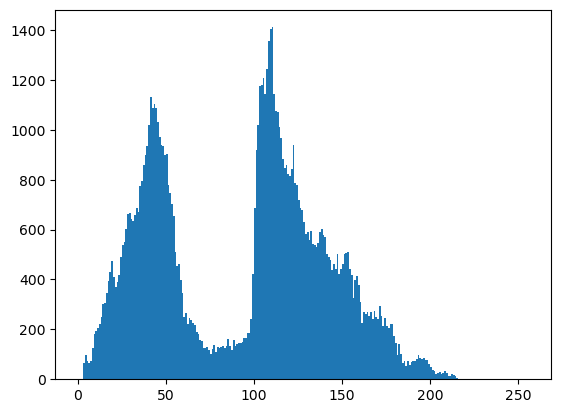

In [231]:
plt.hist(image_gray_general.ravel(), 256, [0, 256])
plt.show()

In [242]:
blur_general = cv2.GaussianBlur(image_gray_general, ksize=(3,3), sigmaX=1)
ret, thresh1 = cv2.threshold(blur_general, 140, 255, cv2.THRESH_BINARY)

cv2.imshow('thresh1', thresh1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [243]:
edged_general = cv2.Canny(thresh1, 10, 255)
contour_general = image_general.copy()

cv2.imshow('edged_general', edged_general)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [244]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
closed_general = cv2.morphologyEx(edged_general, cv2.MORPH_CLOSE , kernel)

contours, hierarchy = cv2.findContours(closed_general,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
final_result = cv2.drawContours(contour_general, contours, -1, (0,255,0), 3)

cv2.imshow('final_result', final_result)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [245]:
folder = "D:/original_image/castle"
file_list = [x for x in os.listdir(folder)]

In [246]:
file_list

['20210827_172442.jpg',
 '20210827_172511.jpg',
 '20210827_172630.jpg',
 '20210827_172855.jpg',
 '20210827_172925.jpg',
 '20210827_173337.jpg',
 '20210827_173359.jpg',
 '20210827_173543.jpg',
 '20210827_173658.jpg',
 '20210827_173718.jpg',
 '20210827_173825.jpg',
 '20210827_173910.jpg',
 '20210827_173930.jpg',
 '20210827_173959.jpg',
 '20210827_174023.jpg',
 '20210827_174055.jpg',
 '20210827_174111.jpg',
 '20210827_174131.jpg',
 '20210827_174237.jpg',
 '20210827_174251.jpg',
 '20210827_174309.jpg',
 '20210827_174406.jpg',
 '20210827_174443.jpg',
 '20210827_174506.jpg',
 '20210827_174607.jpg',
 '20210827_174622.jpg',
 '20210827_174645.jpg',
 '20210827_174703.jpg',
 '20210827_174737.jpg',
 '20210827_174754.jpg',
 'super_castle_0_0.jpg',
 'super_castle_0_100.jpg',
 'super_castle_0_1001.jpg',
 'super_castle_0_1008.jpg',
 'super_castle_0_1028.jpg',
 'super_castle_0_1029.jpg',
 'super_castle_0_1033.jpg',
 'super_castle_0_1034.jpg',
 'super_castle_0_1049.jpg',
 'super_castle_0_1063.jpg',
 'su

In [248]:
cnt=0
for i in tqdm(range(len(file_list))):
    image_general = cv2.imread("D:/original_image/castle/" + file_list[i], cv2.IMREAD_UNCHANGED)
    image_gray_general = cv2.imread("D:/original_image/castle/" + file_list[i], cv2.IMREAD_GRAYSCALE)
    image_general = cv2.resize(image_general, dsize=(300, 300), interpolation=cv2.INTER_LINEAR)
    image_gray_general = cv2.resize(image_gray_general, dsize=(300, 300), interpolation=cv2.INTER_LINEAR)
    
    blur_general = cv2.GaussianBlur(image_gray_general, ksize=(3,3), sigmaX=1)
    ret, thresh1 = cv2.threshold(blur_general, 110, 255, cv2.THRESH_BINARY)
    edged_general = cv2.Canny(thresh1, 10, 250)
    contour_general = image_general.copy()
    
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
    closed_general = cv2.morphologyEx(edged_general, cv2.MORPH_CLOSE , kernel)
    
    contours, hierarchy = cv2.findContours(closed_general,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    final_result = cv2.drawContours(contour_general, contours, -1, (0,255,0), 3)
    
    contours_xy = np.array(contours)
    
    for j in range(len(contours_xy)):
        x_min, x_max = 0,0
        y_min, y_max = 0,0
        x_value = list()
        y_value = list()

        for k in range(len(contours_xy[j])):
            x_value.append(contours_xy[j][k][0][0]) #네번째 괄호가 0일때 x의 값
            y_value.append(contours_xy[j][k][0][1]) #네번째 괄호가 0일때 x의 값

        x_min = min(x_value)
        x_max = max(x_value)
        y_min = min(y_value)
        y_max = max(y_value)

        x = x_min
        y = y_min
        w = x_max-x_min
        h = y_max-y_min


        if w<150 or h<150:
            pass
        else:
            time.sleep(0.01)
            cnt+=1
            img_trim = image_general[y:y+h, x:x+w]
            cv2.imwrite("D:/detecting_image/castle/super_castle" + str(cnt) + ".jpg", img_trim)

100%|████████████████████████████████████████████████████████████████████████████████████████| 998/998 [00:30<00:00, 32.84it/s]


In [25]:
detection_folder = "D:/song_image/tapgol_park"
detection_list = [x for x in os.listdir(detection_folder)]

In [26]:
for i in tqdm(range(len(detection_list))):
    new_image = cv2.imread("D:/song_image/tapgol_park/" + detection_list[i], cv2.IMREAD_UNCHANGED)
    new_image = cv2.resize(new_image, dsize=(200, 200), interpolation=cv2.INTER_LINEAR)
    cv2.imwrite("D:/song_image/tapgol_park/super_tapgol_park" +str(i+1) + ".jpg", new_image)
    

100%|█████████████████████████████████████████████████████████████████████████████| 1200/1200 [00:04<00:00, 276.46it/s]


In [35]:
sample_foler="D:/song_image/indep_door"
sample_list = [x for x in os.listdir(sample_foler)]

In [36]:
not_train_list = random.sample(sample_list, int(len(sample_list)*0.4))



In [37]:
train_list = [x for x in sample_list if x not in not_train_list]

In [38]:
train_list

['super_indep_door100.jpg',
 'super_indep_door1001.jpg',
 'super_indep_door1003.jpg',
 'super_indep_door1004.jpg',
 'super_indep_door1005.jpg',
 'super_indep_door1006.jpg',
 'super_indep_door1008.jpg',
 'super_indep_door101.jpg',
 'super_indep_door1010.jpg',
 'super_indep_door1013.jpg',
 'super_indep_door1015.jpg',
 'super_indep_door1016.jpg',
 'super_indep_door1017.jpg',
 'super_indep_door1018.jpg',
 'super_indep_door1019.jpg',
 'super_indep_door102.jpg',
 'super_indep_door1020.jpg',
 'super_indep_door1021.jpg',
 'super_indep_door1026.jpg',
 'super_indep_door1027.jpg',
 'super_indep_door1028.jpg',
 'super_indep_door1029.jpg',
 'super_indep_door1030.jpg',
 'super_indep_door1031.jpg',
 'super_indep_door1033.jpg',
 'super_indep_door1034.jpg',
 'super_indep_door1035.jpg',
 'super_indep_door1036.jpg',
 'super_indep_door1038.jpg',
 'super_indep_door1041.jpg',
 'super_indep_door1043.jpg',
 'super_indep_door1045.jpg',
 'super_indep_door1048.jpg',
 'super_indep_door1049.jpg',
 'super_indep_doo

In [39]:
validation_list = random.sample(not_train_list, int(len(not_train_list)/2))
validation_list

['super_indep_door509.jpg',
 'super_indep_door614.jpg',
 'super_indep_door580.jpg',
 'super_indep_door487.jpg',
 'super_indep_door928.jpg',
 'super_indep_door1091.jpg',
 'super_indep_door588.jpg',
 'super_indep_door500.jpg',
 'super_indep_door482.jpg',
 'super_indep_door1197.jpg',
 'super_indep_door853.jpg',
 'super_indep_door613.jpg',
 'super_indep_door829.jpg',
 'super_indep_door933.jpg',
 'super_indep_door273.jpg',
 'super_indep_door385.jpg',
 'super_indep_door1146.jpg',
 'super_indep_door260.jpg',
 'super_indep_door190.jpg',
 'super_indep_door449.jpg',
 'super_indep_door373.jpg',
 'super_indep_door125.jpg',
 'super_indep_door20.jpg',
 'super_indep_door597.jpg',
 'super_indep_door284.jpg',
 'super_indep_door646.jpg',
 'super_indep_door909.jpg',
 'super_indep_door804.jpg',
 'super_indep_door779.jpg',
 'super_indep_door134.jpg',
 'super_indep_door147.jpg',
 'super_indep_door1032.jpg',
 'super_indep_door608.jpg',
 'super_indep_door64.jpg',
 'super_indep_door641.jpg',
 'super_indep_door

In [40]:
test_list = [x for x in not_train_list if x not in validation_list]
test_list

['super_indep_door1039.jpg',
 'super_indep_door629.jpg',
 'super_indep_door157.jpg',
 'super_indep_door606.jpg',
 'super_indep_door1185.jpg',
 'super_indep_door394.jpg',
 'super_indep_door934.jpg',
 'super_indep_door1070.jpg',
 'super_indep_door288.jpg',
 'super_indep_door858.jpg',
 'super_indep_door1092.jpg',
 'super_indep_door635.jpg',
 'super_indep_door1056.jpg',
 'super_indep_door199.jpg',
 'super_indep_door843.jpg',
 'super_indep_door696.jpg',
 'super_indep_door672.jpg',
 'super_indep_door728.jpg',
 'super_indep_door772.jpg',
 'super_indep_door241.jpg',
 'super_indep_door478.jpg',
 'super_indep_door239.jpg',
 'super_indep_door543.jpg',
 'super_indep_door46.jpg',
 'super_indep_door431.jpg',
 'super_indep_door242.jpg',
 'super_indep_door1011.jpg',
 'super_indep_door348.jpg',
 'super_indep_door400.jpg',
 'super_indep_door690.jpg',
 'super_indep_door363.jpg',
 'super_indep_door91.jpg',
 'super_indep_door671.jpg',
 'super_indep_door752.jpg',
 'super_indep_door1115.jpg',
 'super_indep_d

In [41]:
for file in tqdm(test_list):
    image = Image.open("D:/song_image/indep_door/" + file)
    image.save("D:/image/test/indep_door/" + file)
    
for file in tqdm(validation_list):
    image = Image.open("D:/song_image/indep_door/" + file)
    image.save("D:/image/validation/indep_door/" + file)
    
for file in tqdm(train_list):
    image = Image.open("D:/song_image/indep_door/" + file)
    image.save("D:/image/train/indep_door/" + file)

100%|███████████████████████████████████████████████████████████████████████████████| 720/720 [00:02<00:00, 308.76it/s]
